In [7]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO


In [8]:
# Choose a model: ResNet18, ResNet50, or MobileNetV2
model = models.resnet18(pretrained=True)
model.eval()  # Set to evaluation mode
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [9]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


In [10]:
import requests

url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
response = requests.get(url)
class_names = response.text.splitlines()
print(class_names[:5])  # Check first 5 classes



['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead']


In [11]:
def predict_image(image_url):
    # Load image
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content)).convert('RGB')
    
    # Preprocess
    input_tensor = preprocess(img).unsqueeze(0).to(device)
    
    # Forward pass
    with torch.no_grad():
        outputs = model(input_tensor)
        probabilities = torch.nn.functional.softmax(outputs[0], dim=0)
    
    # Top-5 predictions
    top5_prob, top5_catid = torch.topk(probabilities, 5)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    for i in range(top5_prob.size(0)):
        print(f"{class_names[top5_catid[i]]}: {top5_prob[i].item()*100:.2f}%")


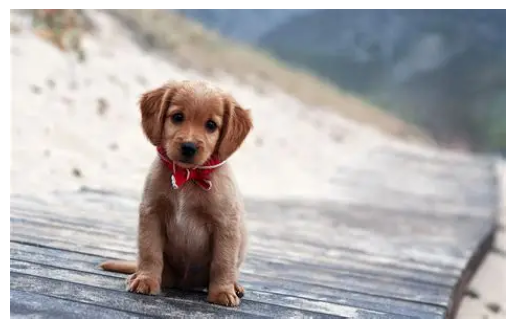

golden retriever: 57.37%
Labrador retriever: 27.52%
Brittany spaniel: 2.99%
clumber: 2.27%
Chesapeake Bay retriever: 1.86%


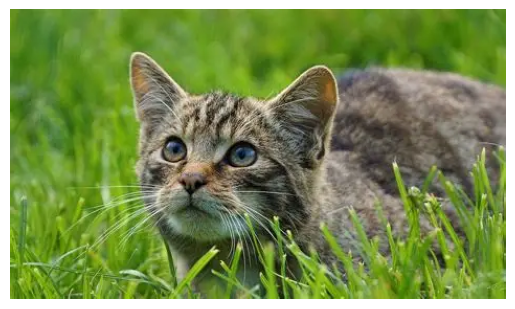

tiger cat: 42.77%
tabby: 30.73%
lynx: 17.06%
Egyptian cat: 5.98%
leopard: 0.47%


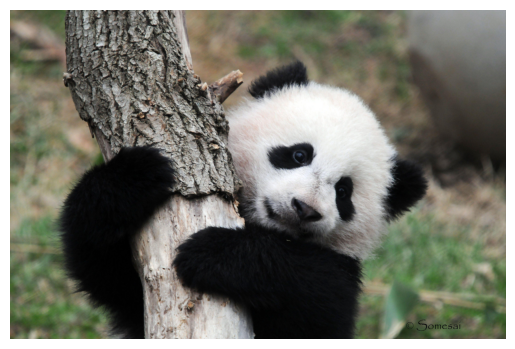

giant panda: 99.62%
indri: 0.36%
gibbon: 0.01%
capuchin: 0.00%
colobus: 0.00%


In [12]:
images = [
    "https://tse3.mm.bing.net/th/id/OIP.XYfMhr3QgqvOvFMyCHJVVgHaEo?rs=1&pid=ImgDetMain&o=7&rm=3",# dog
    "https://tse4.mm.bing.net/th/id/OIP.yvj61X0dbFFF8viA7fmKcAHaEV?rs=1&pid=ImgDetMain&o=7&rm=3",# cat
    "https://wallpaperaccess.com/full/2145406.jpg",# panda
]

for url in images:
    predict_image(url)
